In [9]:
import tqdm
import numpy as np
import networkx as nx
from networkx.generators.community import connected_caveman_graph
from IPython.display import clear_output, display

In [10]:
#Generates Chordal Graphs and converts them into networkx object

def generate_graph():
    graphs = []
    #total=(np.floor(end/step).astype(int))
    properties = []
    avg_degree=0
    avg_density=0
    #num_of_nodes=start
    for num_of_cliques in range(1,101,1):
        clear_output(wait=True)
        print(num_of_cliques)
        #for size_of_clique in range(5,151,5):
        ng = nx.connected_caveman_graph(num_of_cliques, 5)
        if (nx.is_connected(ng)):
            #nx.draw(ng)
            graphs.append(ng)
            val = np.array([ng.number_of_nodes(), ng.number_of_edges(), average_degree(ng), nx.density(ng)])
            properties.append(val)
            avg_degree+=average_degree(ng)
            avg_density+=nx.density(ng)
                #num_of_nodes+=step
    return graphs, properties,avg_degree/len(graphs),avg_density/len(graphs)

In [11]:
def average_degree(G):
    sum_of_degrees=sum(dict(G.degree).values())
    num_of_nodes=G.number_of_nodes()
    avg_degree=sum_of_degrees/num_of_nodes
    return avg_degree

In [12]:
graphs, properties,avg_degree,avg_density = generate_graph() #start, end, step
print(avg_degree)
print(avg_density)

100
3.9960000000000004
0.043585427227045594


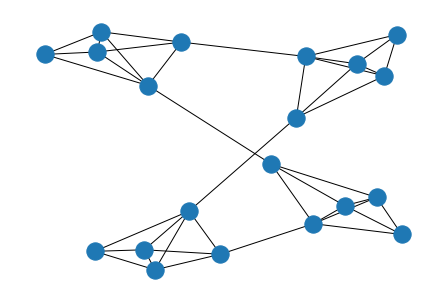

In [13]:
nx.draw(graphs[3])

In [17]:
len(graphs)

100

In [14]:
import pickle
with open("full_data/NEW_connected_cavemen_graphs_100.pkl", "wb") as fp:
    pickle.dump(graphs, fp)
with open("full_data/NEW_connected_cavemen_properties_100.pkl", "wb") as fp:
    pickle.dump(properties, fp)

In [15]:
import pickle
with open("sliced_data/NEW_connected_cavemen_graphs_100.pkl", "wb") as fp:
    pickle.dump(graphs[:50], fp)
with open("sliced_data/NEW_connected_cavemen_properties_100.pkl", "wb") as fp:
    pickle.dump(properties[:50], fp)